A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


1. Matriz de correlacióm

<AxesSubplot:>

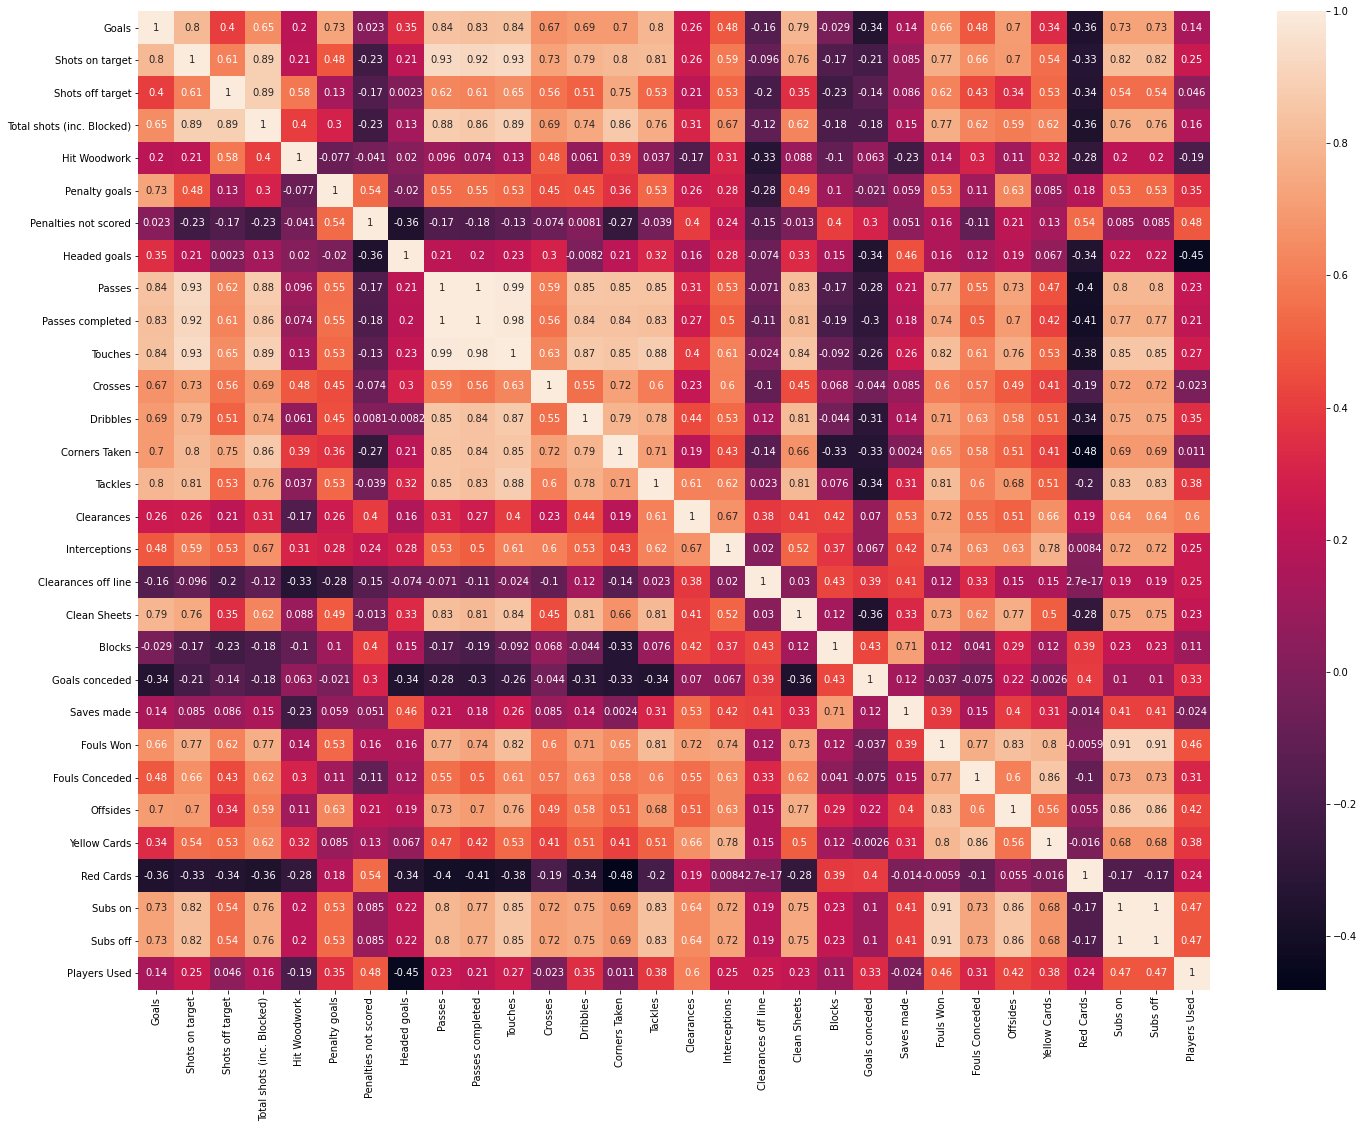

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot= True)

2. Modelos de regresion

In [5]:
for i, x in enumerate(df['Shooting Accuracy']):
    df['Shooting Accuracy'][i] = x[:-1]

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df['Shooting Accuracy'] = df['Shooting Accuracy'].astype(float)

In [7]:
x = np.array(df['Shooting Accuracy']).reshape(-1,1)

In [8]:
y = np.array(df['Goals'])

In [9]:
polynomial_model = PolynomialFeatures(x)

In [10]:
type(x)

numpy.ndarray

In [11]:
y.shape

(16,)

In [12]:
def get_poly_scores(x,y, dataframe, degrees):
    degree = []
    train_score = []
    test_score = []
    R2_score = []
    
    for i in range(degrees[0], degrees[1] + 1):
        degree.append(i)
        poly_model = PolynomialFeatures(i)
        poly_x = poly_model.fit_transform(x, y)
        x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size= 0.2, random_state= 42)
        lin_model = LinearRegression(n_jobs=-1)
        lin_model.fit(x_train, y_train)
        train_score.append(lin_model.score(x_train, y_train))
        y_test_predict = lin_model.predict(x_train)
        test_score.append(r2_score(y_train, y_test_predict))

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
        X_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='b')
        X_train_to_show, y_pred = zip(*sorted(zip(x_train, y_test_predict)))
        plt.plot(X_train_to_show, y_pred, color='red')
        plt.scatter(X_train_to_show, y_pred, color='red')
        plt.title("Poninominal degree " + str(i))
        plt.show()
        
        
    dic_scores = {'degree': degree, 'train score': train_score, 'test score': test_score}
    scores_df = pd.DataFrame(dic_scores)
    return scores_df

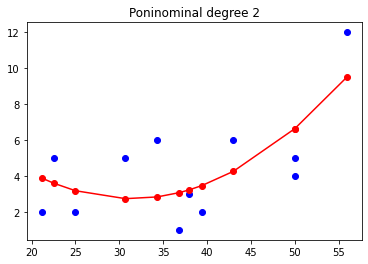

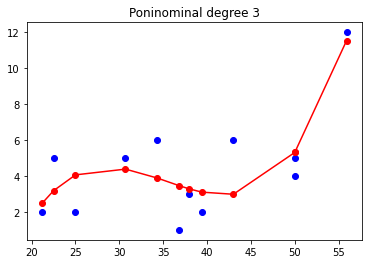

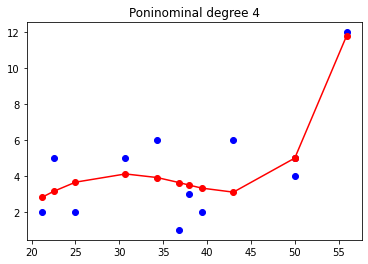

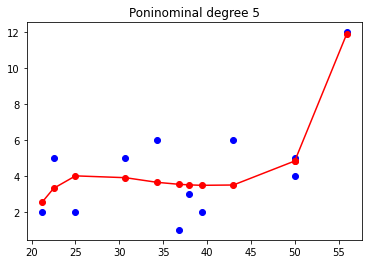

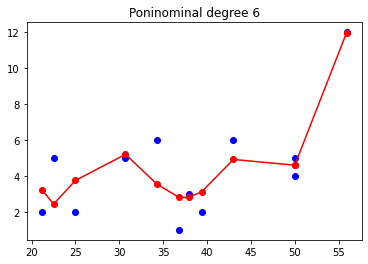

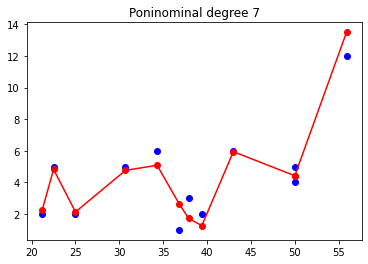

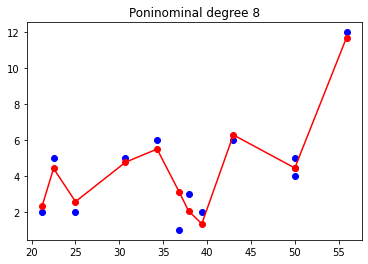

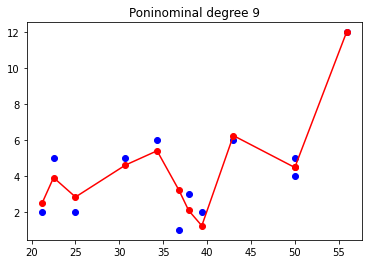

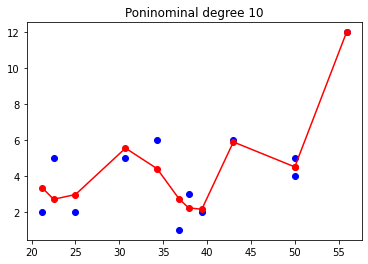

,degree,train score,test score
0,2,0.500123,0.500123
1,3,0.671936,0.671936
2,4,0.679875,0.679875
3,5,0.686108,0.686108
4,6,0.752101,0.752101
5,7,0.908451,0.908451
6,8,0.919485,0.919485
7,9,0.900017,0.900017
8,10,0.841910,0.841910


In [13]:
get_poly_scores(x= x,y= y, dataframe=df, degrees=(2, 10))

In [14]:
def get_Linear_reg_scores(x,y):
    train_score = []
    test_score = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
    lin_model = LinearRegression(n_jobs=-1)
    lin_model.fit(x_train, y_train)
    train_score.append(lin_model.score(x_train, y_train))
    y_test_predict = lin_model.predict(x_test)
    test_score.append(r2_score(y_test, y_test_predict))
    y_train_predict = lin_model.predict(x_train)

    
    X_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(x_train, y_train_predict)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.scatter(X_train_to_show, y_pred, color='red')
    plt.title("Linear Regression")
    plt.show()

    X_test_to_show, y_test_to_show = zip(*sorted(zip(x_test, y_test)))
    plt.scatter(X_test_to_show, y_test_to_show, color='b')
    X_test_to_show, y_pred = zip(*sorted(zip(x_test, y_test_predict)))
    plt.plot(X_test_to_show, y_pred, color='red')
    plt.scatter(X_test_to_show, y_pred, color='red')
    plt.title("Linear Regression with test batch")
    plt.show()
        
    dic_scores = {'train score': train_score, 'test score': test_score}
    scores_df = pd.DataFrame(dic_scores)
    return scores_df

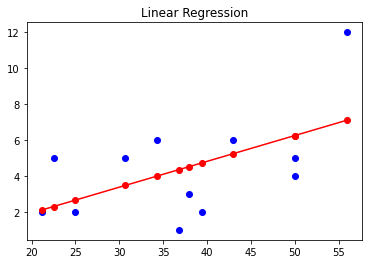

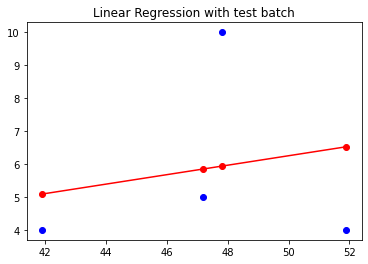

,train score,test score
0,0.301706,-0.001941


In [15]:
get_Linear_reg_scores(x,y)

In [16]:
def try_SVR(x, y):
    solvers = []
    train_scores = []
    test_scores = []
    params = ['linear', 'rbf', 'poly']
    scaler = StandardScaler()
    standard_x = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(standard_x, y, test_size= 0.2,random_state=42)
    for p in params:
        solvers.append(p)
        svr_model = SVR(kernel= p, C=100, gamma= 0.1, epsilon= 0.1)
        model = svr_model.fit(x_test, y_test)
        train_score = model.score(x_train, y_train) * 100
        train_scores.append(train_score)
        y_train_predict = model.predict(x_train)
        y_test_predict = model.predict(x_test)
        test_scores.append(model.score(x_test, y_test) * 100)

        X_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='b')
        X_train_to_show, y_pred = zip(*sorted(zip(x_train, y_train_predict)))
        plt.plot(X_train_to_show, y_pred, color='red')
        plt.scatter(X_train_to_show, y_pred, color='red')
        plt.title("SVR:"+ " " + str(p))
        plt.show()

        X_test_to_show, y_test_to_show = zip(*sorted(zip(x_test, y_test)))
        plt.scatter(X_test_to_show, y_test_to_show, color='b')
        X_test_to_show, y_pred = zip(*sorted(zip(x_test, y_test_predict)))
        plt.plot(X_test_to_show, y_pred, color='red')
        plt.scatter(X_test_to_show, y_pred, color='red')
        plt.title("SVR with test batch:"+ " " + str(p))
        plt.show()

    dic_svr = {'solvers': solvers, 'train score': train_scores, 'test score': test_scores}
    score_df = pd.DataFrame(dic_svr) 
    return score_df

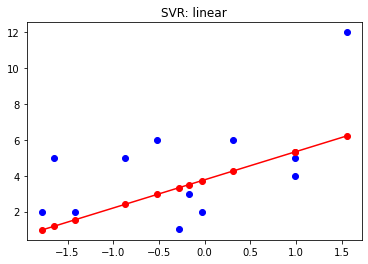

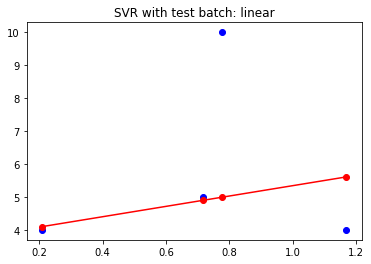

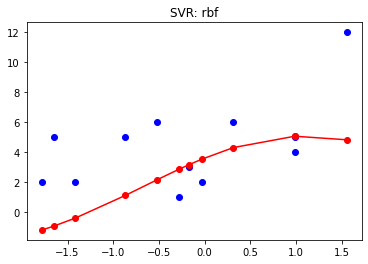

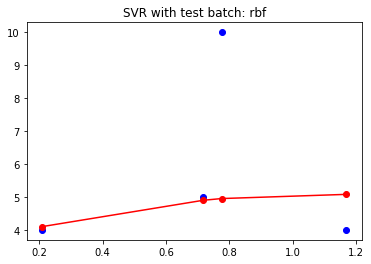

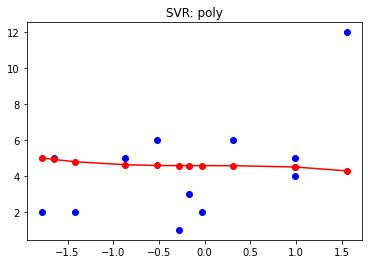

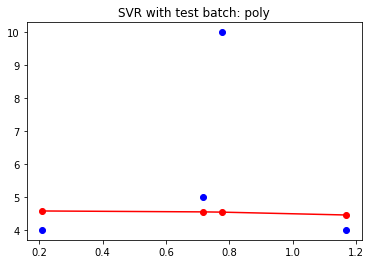

,solvers,train score,test score
0,linear,16.878871,-11.938237
1,rbf,-49.369103,-7.753012
2,poly,-8.444175,-23.449726


In [17]:
try_SVR(x,y)

3. Goal prediction

In [18]:
for i, x in enumerate(df['% Goals-to-shots']):
    df['% Goals-to-shots'][i] = x[:-1]

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
df['% Goals-to-shots'] = df['% Goals-to-shots'].astype(float)

In [20]:
x = df[['% Goals-to-shots','Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles']]

In [21]:
y = df['Goals']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
log_model = LogisticRegression(n_jobs=-1)
log_model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [24]:
print('train score:', log_model.score(x_train, y_train))
y_test_pred = log_model.predict(x_test)
print('test score:',log_model.score(x_test, y_test))

train score: 1.0
test score: 0.25


In [25]:
log_model.predict([[40, 102, 5, 82, 23]])

array([5], dtype=int64)

In [26]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [27]:
print('train score:', svc_model.score(x_train, y_train))
y_test_pred = svc_model.predict(x_test)
print('test score:', svc_model.score(x_test, y_test))

train score: 0.4166666666666667
test score: 0.0


In [28]:
svc_model.predict([[40, 102, 5, 82, 23]])

array([2], dtype=int64)

In [29]:
def try_SVC(x, y):
    solvers = []
    train_scores = []
    test_scores = []
    params = ['linear', 'rbf', 'poly']
    scaler = StandardScaler()
    standard_x = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(standard_x, y, test_size= 0.2,random_state=42)
    for p in params:
        solvers.append(p)
        svr_model = SVR(kernel= p, C=100, gamma= 0.1)
        model = svr_model.fit(x_test, y_test)
        train_score = model.score(x_train, y_train) * 100
        train_scores.append(train_score)
        y_train_predict = model.predict(x_train)
        y_test_predict = model.predict(x_test)
        test_scores.append(model.score(x_test, y_test) * 100)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
        X_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='b')
        X_train_to_show, y_pred = zip(*sorted(zip(x_train, y_train_predict)))
        plt.plot(X_train_to_show, y_pred, color='red')
        plt.scatter(X_train_to_show, y_pred, color='red')
        plt.title("SVC:"+ " " + str(p))
        plt.show()

        X_test_to_show, y_test_to_show = zip(*sorted(zip(x_test, y_test)))
        plt.scatter(X_test_to_show, y_test_to_show, color='b')
        X_test_to_show, y_pred = zip(*sorted(zip(x_test, y_test_predict)))
        plt.plot(X_test_to_show, y_pred, color='red')
        plt.scatter(X_test_to_show, y_pred, color='red')
        plt.title("SVC with test batch:"+ " " + str(p))
        plt.show()

    dic_svr = {'solvers': solvers, 'train score': train_scores, 'test score': test_scores}
    score_df = pd.DataFrame(dic_svr) 
    return score_df

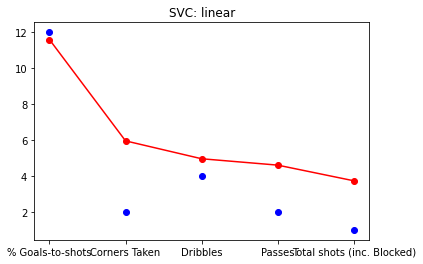

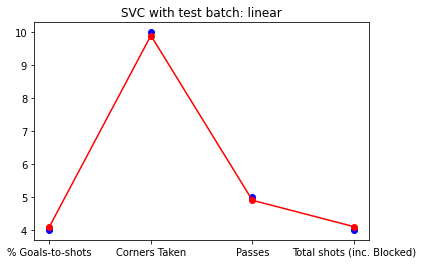

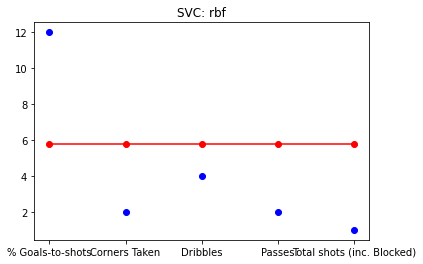

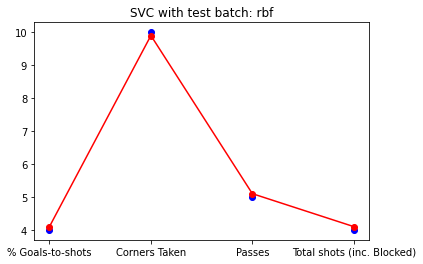

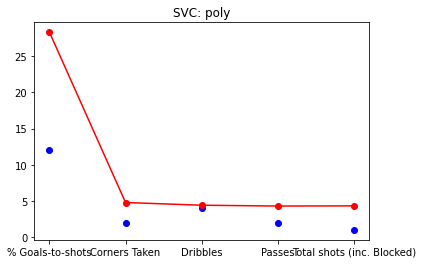

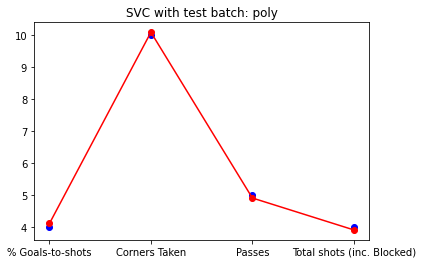

,solvers,train score,test score
0,linear,10.968399,99.838588
1,rbf,-24.193152,99.838384
2,poly,-314.108916,99.838157


In [30]:
try_SVC(x, y)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

In [32]:
forest_model = RandomForestClassifier()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [34]:
k_fold = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=2)
n_scores = cross_val_score(forest_model, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')

print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), U

In [35]:
y

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [36]:
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
forest_model.predict([[40, 102, 5, 82, 23]])

array([4], dtype=int64)

In [38]:
forest_model.score(x_test, y_test)

0.25

In [57]:
x = np.array(x)

In [58]:
y = np.array(y)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [60]:
k_fold = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
val_score = []
train_score = []
# define the model
n_stimators = 1500
model = RandomForestClassifier(warm_start=True)
path = os.getcwd() + os.sep
print("path:", path)
# train son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de entrenamiento
# val son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de validación
for i, (train, val) in enumerate(k_fold.split(x_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    #print("val:", val)
    print("val_size:", len(val))
    #print("batch:", X_train[train])
    print(x_train[train])
    print(y_train[train])
    # train the model
    model.fit(x_train[train], y_train[train])

    # Add more stimators
    model.n_estimators += 100

    score_val = model.score(x_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(x_train[train], y_train[train])
    train_score.append(score_train)
    # Ejemplo de guardar y parar el entrenamiento por haber conseguido un buen resultado
    if np.mean(val_score) > 0.99 and len(val_score) > 50:
        pickle.dump(model, open(path + "model_saved.sav", "wb"))
        print("STOP")
        break
    print("##############")

path: c:\Users\jarai\Desktop\Python_work\TheBridge\Alumno\Javier_Araiz_TheBridge\week10_ML_competition_pca_kmeans\day1_gridsearch_pipelines\exercises\
Iteración: 1
train/índices batch: [ 0  1  5  6  7  8  9 11]
batch_size: 8
val_size: 4
[[  16.   100.    44.  4317.   106. ]
 [   5.2   28.     8.   851.    18. ]
 [   6.    38.    18.  1276.    26. ]
 [   6.5   65.    28.  2066.    76. ]
 [   7.5  110.    30.  3016.    75. ]
 [   9.3   82.    41.  1891.    64. ]
 [  12.5   59.    21.  1602.    40. ]
 [  19.2   32.    10.  1187.    53. ]]
[12  1  2  3  6  6  5  5]
##############
Iteración: 2
train/índices batch: [ 2  3  4  5  8  9 10 11]
batch_size: 8
val_size: 4
[[   4.1   60.    22.  1556.    49. ]
 [   5.2   48.    14.  1059.    39. ]
 [  20.    27.    16.  1298.    32. ]
 [   6.    38.    18.  1276.    26. ]
 [   9.3   82.    41.  1891.    64. ]
 [  12.5   59.    21.  1602.    40. ]
 [  17.2   40.    16.  1488.    60. ]
 [  19.2   32.    10.  1187.    53. ]]
[2 2 4 2 6 5 5 5]


ValueError: operands could not be broadcast together with shapes (4,4) (4,6) (4,4) 